Mean Squared Displacement (MSD):
Water Oxygens: 5.6384 nm²
Sodium Ions: 3.5466 nm²
Chlorine Ions: 3.6481 nm²


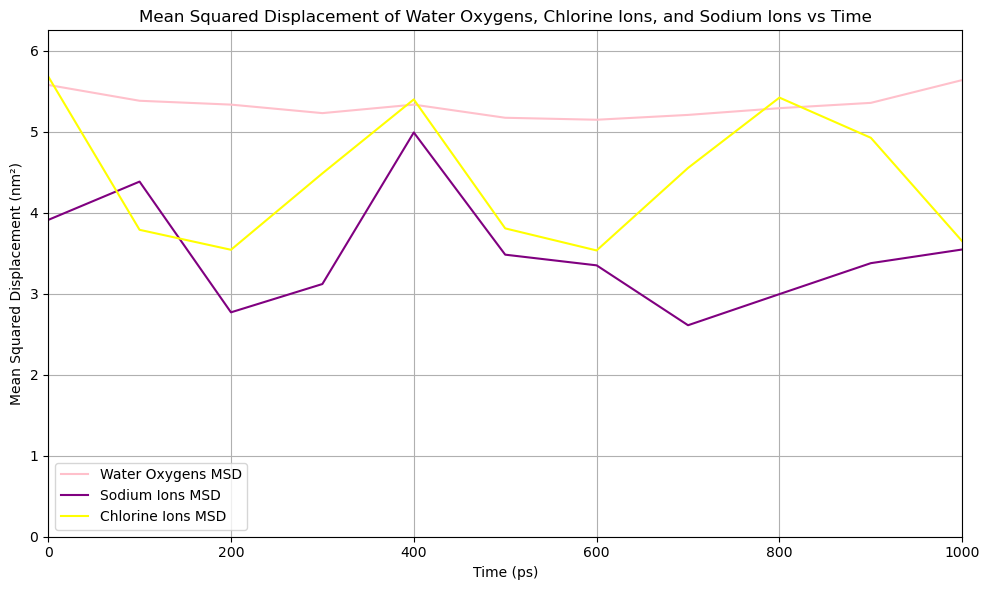

In [14]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# File paths
traj_file = 'combined.xtc'
topology_file = 'step5_5.gro'
output_plot_file = 'msd_plot.png'

# Load your trajectory and topology
traj = md.load(traj_file, top=topology_file)

# Select water oxygens (HOH), sodium ions (SOD), and chlorine (CLA)
water_oxygens = traj.top.select('name O and resname HOH')
sodium_ions = traj.top.select('resname SOD')
chlorine_ions = traj.top.select('resname CLA')

# Check if selections are valid
if len(water_oxygens) == 0:
    raise ValueError("No water oxygens found.")
if len(sodium_ions) == 0:
    raise ValueError("No sodium ions found.")
if len(chlorine_ions) == 0:
    raise ValueError("No chlorine ions found.")

# Function to compute MSD
def compute_msd(traj, indices):
    positions = traj.xyz[:, indices, :]
    mean_position = np.mean(positions, axis=0)
    msd = np.mean(np.sum((positions - mean_position[np.newaxis, :, :]) ** 2, axis=2), axis=1)
    return msd

# Calculate MSDs
msd_water = compute_msd(traj, water_oxygens)
msd_sodium = compute_msd(traj, sodium_ions)
msd_chlorine = compute_msd(traj, chlorine_ions)

# Print the MSD values
print("Mean Squared Displacement (MSD):")
print(f"Water Oxygens: {msd_water[-1]:.4f} nm²")
print(f"Sodium Ions: {msd_sodium[-1]:.4f} nm²")
print(f"Chlorine Ions: {msd_chlorine[-1]:.4f} nm²")

# Prepare time array
time = np.arange(len(msd_water)) * traj.timestep

# Create plot
plt.figure(figsize=(10, 6))

# Plot MSDs
plt.plot(time, msd_water, label='Water Oxygens MSD', color='pink')
plt.plot(time, msd_sodium, label='Sodium Ions MSD', color='purple')
plt.plot(time, msd_chlorine, label='Chlorine Ions MSD', color='yellow')

# Set labels and title
plt.title('Mean Squared Displacement of Water Oxygens, Chlorine Ions, and Sodium Ions vs Time')
plt.xlabel('Time (ps)')
plt.ylabel('Mean Squared Displacement (nm²)')
plt.legend()
plt.grid()

# Set axis limits if needed
plt.xlim(0, time[-1])  # Adjust as needed
plt.ylim(0, np.max([msd_water.max(), msd_sodium.max(), msd_chlorine.max()]) * 1.1)  # Adjust for visibility

# Save the plot as a PNG file
plt.savefig(output_plot_file, dpi=300)

# Show plot
plt.tight_layout()
plt.show()
